# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

**d.** The proportion of users converted.

In [5]:
p_conv = df.query('converted == 1')['user_id'].count()/df.shape[0]
p_conv

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
df.query('group == "treatment" and landing_page != "new_page"')['user_id'].count()

1965

The number of times when the "group" is control while the landing_page is a new_page is also obtained as follows.

In [7]:
df.query('group == "control" and landing_page == "new_page"')['group'].count()

1928

**f.** Do any of the rows have missing values?

In [8]:
# check the info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


<font color = 'blue'>
    
> **No missing values are observed.** All columns have the same number of non-null cells, which is equal to the total number of rows in the dataframe. 

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Extracting incorrect rows into a separate dataframe.
df_incorr = df.query('group == "treatment" and landing_page != "new_page"')
df_incorr = df_incorr.append(df.query('group == "control" and landing_page == "new_page"'))

In [10]:
df_incorr.shape

(3893, 5)

In [11]:
# Removing the inaccurate rows, and store the result in a new dataframe df2
df2 = df[~df.index.isin(df_incorr.index)]

In [12]:
# Double checking the size of df2
df2.shape[0] == df.shape[0] - df_incorr.shape[0]

True

In [13]:
# Double Checking all of the incorrect rows were removed from df2 - 
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [14]:
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2['user_id'].loc[df2.duplicated(['user_id'], keep=False)]

1899    773192
2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [16]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [17]:
# Removing one of the rows with a duplicate user_id.
df2 = df2.drop_duplicates(['user_id'], keep='first')

In [18]:
# Checking again if the row with a duplicate user_id is deleted or not
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted


In [19]:
df2['user_id'].nunique()

290584

In [20]:
df2.shape[0] == df2['user_id'].nunique()

True

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

> The probability computed represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [21]:
p_pop = df2.query('converted == 1')['user_id'].count()/df2.shape[0]
p_pop

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
# Creating a separate dataframe for the control group
df_control = df2.query('group == "control"')

In [58]:
# Calculating the conversion propability from the control dataframe
p_pop_cont = df_control.query('converted == 1')['user_id'].count()/df_control.shape[0]
p_pop_cont

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
# Creating a separate dataframe for the treatment group
df_treatment = df2.query('group == "treatment"')

In [59]:
# Calculating the conversion probability from the treatment dataframe
p_pop_tr = df_treatment.query('converted == 1')['user_id'].count()/df_treatment.shape[0]
p_pop_tr

0.11880806551510564

> The probabilities computed in the points (b). and (c). above can also be treated as conversion rate. 
The actual difference  (`obs_diff`) between the conversion rates for the two groups is then calculated as follows.  

In [41]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = p_pop_tr - p_pop_cont 
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [28]:
p_newpage = df2.query('landing_page == "new_page"')['user_id'].count()/df2.shape[0]
p_newpage

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

In [29]:
p_treatment = df2.query('group == "treatment"')['user_id'].count()/df2.shape[0]
p_treatment

0.5000619442226688

<font color='blue'>
    
>The probability of converting to the new page given the individual is in the the treatment group is slightly less than that if the individual is in the control group. <br>
> **This means that the "treatment" group users are slightly less likely to convert to the new product.**


<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

<font color = 'blue'>
    
>$H_0: p_{old} - p_{new} \geq 0 $

> $H_1: p_{old} - p_{new} < 0 $

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [30]:
p_new = p_pop
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [31]:
p_old = p_pop
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [32]:
n_new = df_treatment.shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [33]:
n_old = df_control.shape[0]
n_old

145274

In [51]:
obs_diff_null = p_new - p_old

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>


In [34]:
# Generating a numpy array of converted values for treatment group.
new_conv_array = np.array(df_treatment['converted'])
new_conv_array

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [35]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice(new_conv_array, size=n_new, replace=True)

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [36]:
# Generating a numpy array of converted values for control group.
old_conv_array = np.array(df_control['converted'])
old_conv_array

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [37]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice(old_conv_array, size=n_old, replace=True)

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [38]:
# Calculating conversion probability for sample of treatment group.
p_new_dash = new_page_converted.mean()
p_new_dash

0.11954442226963044

In [39]:
# Calculating conversion probability for sample of control group.
p_old_dash = old_page_converted.mean()
p_old_dash

0.11942949185676721

In [46]:
obs_diff_dash = p_new_dash - p_old_dash
obs_diff_dash

-0.0004768514490147563


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [43]:
# Sampling distribution 
p_diffs = np.zeros(10000, dtype=np.float64)
for i in range(0,10000):
    new_page_converted = np.random.choice(new_conv_array, size=n_new, replace=True)
    old_page_converted = np.random.choice(old_conv_array, size=n_old, replace=True)
    p_new_dash = new_page_converted.mean()
    p_old_dash = old_page_converted.mean()
    p_diffs[i] = p_new_dash - p_old_dash

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  


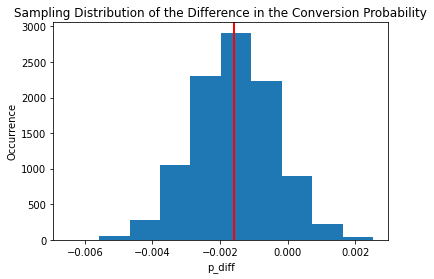

In [56]:
plt.hist(p_diffs)
plt.title('Sampling Distribution of the Difference in the Conversion Probability')
plt.xlabel('p_diff')
plt.ylabel('Occurrence')
plt.axvline(obs_diff, color='r', linewidth=2)

<font color = 'blue'>
    
### Plotting the Null Distribution to accurately calculate the p-value:

In [61]:
s_mean = obs_diff

In [62]:
s_std = p_diffs.std()

In [63]:
null_mean = 0

In [64]:
null_dist = np.random.normal(0,s_std, df.shape[0])

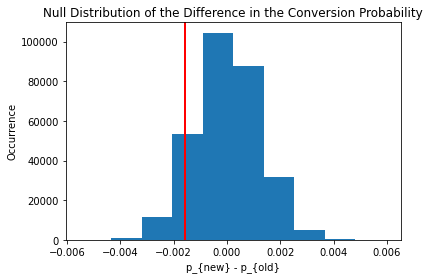

In [65]:
plt.hist(null_dist)
plt.title('Null Distribution of the Difference in the Conversion Probability')
plt.xlabel('p_{new} - p_{old}')
plt.ylabel('Occurrence')
plt.axvline(x=s_mean, color='r', linewidth=2);

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [67]:
p_val = (null_dist > obs_diff).mean()
p_val

0.9079965226604364

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages?

<font color='blue'>
    
>**This value is known as the p-value.**

> Since the p-value is much greater than the Type 1 error rate, it means that we fail to reject the Null Hypothesis. This suggests that we expect to have no difference between the conversion rates from the new and old pages. 

</font>



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [68]:
import statsmodels.api as sm

In [69]:
# number of conversions with the old_page
convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
print('The number of conversions with the old page is {}'.format(convert_old))

# number of conversions with the new_page
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
print('The number of conversions with the new page is {}'.format(convert_new))

# number of individuals who were shown the old_page
n_old = df2.query('landing_page == "old_page"')['user_id'].count()
print('The number of individuals who were shown the old_page is {}'.format(n_old))

# number of individuals who received new_page
n_new = df2.query('landing_page == "new_page"')['user_id'].count()
print('The number of individuals who were shown the new_page is {}'.format(n_new))


The number of conversions with the old page is 17489
The number of conversions with the new page is 17264
The number of individuals who were shown the old_page is 145274
The number of individuals who were shown the new_page is 145310


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
><br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
><br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

In [72]:
# Obtaining the count_array, which is the number of "converted" for each group
count_array = [convert_new, convert_old]
count_array

[17264, 17489]

In [73]:
# Obtaining the nobs_array, which is the total number of observations (rows) in each group
nobs_array = [n_new, n_old]
nobs_array

[145310, 145274]

In [74]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments; 
# The alternative is selected to be 'larger' since the distribution is right-tailed according to the hypothesis formulation. 
z_score, p_value = sm.stats.proportions_ztest(count_array, nobs_array, alternative='larger')
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>


<font color='blue'>
    
> Since $𝑍_{0.05} = 1.645$ for one-tailed tests, and in this case, our hypthesis test is Right-tailed, the following conditions apply: <br>
>> For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$, where $\alpha = 0.05$. <br>

> For the obtained $Z_{score} = -1.311$, $Z_{score} < Z_{\alpha}$. Hence, we fail to reject the null hypothesis.

> Furthermore, the obtained p-value of $0.905$ is much greater than the Type 1 error rate $\alpha$ of $0.05$. This further confirms that we fail to reject the null hypothesis. 

> The results obtained with this approach match those obtained with the Null Hypothesis Testing-based approach in the previous part.  

> By failing to reject the null, this means that the conversion rates from the new page are likely to be lower than that from the old page. This means that, using the old page is expected to provide a similar or better conversion rate compared to the new page.

> Based on this analysis, we can recommend that the old page should be maintained, since no significant increase in conversion rates is expected with the new page, although significant monetary investments are expected to occur when the new page is implemented. 

</font>

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

<font color='blue'>
    
>**Logistic Regression.** <br>
> Since the Response variable (converted or not) is categorical, a logistic regression model should be used.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [75]:
# Creating the intercept column.
df2['intercept'] = 1

In [76]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1


In [77]:
# Getting the dummy variable columns.
df2[['control', 'treatment']]=pd.get_dummies(df2['group'])

In [78]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [79]:
# Dropping redundant column. 
df2.drop(['control'], axis=1, inplace=True)

In [80]:
# Renaming the treatment column as 'ab_page'
df2.rename(columns = {'treatment':'ab_page'}, inplace = True)

In [81]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [82]:
lm = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [83]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-01-26 11:40 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


<font color = 'blue'>

> The p-value associated with ab_page = $0.1899$ which is greater than the Type 1 error rate of 0.05. This means that, using logistic regression, we also fail to reject the Null Hypothesis. <br>

> The p-value obtained with Logistic Regression is different from the answer in Part II because the logistic regression model assumes a Two-Tailed Hypothesis, where as for the 2-sample Z-test, we used a Right-Tailed Hypothesis. <br>

> For the Logistic Regression Model, the null and alternative hypotheses are as follows: <br>

> $H_0: p_{old} = p_{new}$ <br>
> $H_1: p_{old} \neq p_{new}$ 

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

In [84]:
# Checking the duration of data collection. 
[df2.timestamp.min(), df2.timestamp.max()] 

['2017-01-02 13:42:05.378582', '2017-01-24 13:41:54.460509']

<font color = 'blue'>
    
> Using the different Hypothesis test methods used so far, we have failed to reject the null hypothesis, suggesting that there is no statistically significant difference in the product purchase rates (determined by the conversion rates) between users who viewed the old page and those who viewed the new page. 

> While the number of data points collected for the initial sample (290584 unique rows in df2) is quite large, additional analysis is required to further validate these results. For instance, this data was collected over the course of 22 days only, which introduces the possibility of users being reluctant to change, or unable to handle the new webpage correctly. Hence, a longer data collection duration may be required in order to try and exclude this change aversion effect.

> The gender of users may also be a variable affecting the convesion rates of the users, since females may be more attracted to colors and other visual effects in the new page, which impacts their decision on purchasing the product. Nevertheless, we need to maintain a gender balance in the collected data to ensure the accuracy of the Logistic Regression model.

> Since the time duration and the gender of the users are both independent variables, they are not expected to cause problems in the Logistic Regression model. This is because, a dependence between the explanatory variables would distort the results and make it difficult to draw reliable conclusions and/or interpretations from the obtained coefficients.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [85]:
# Read the countries.csv
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [86]:
# Join with the df2 dataframe
df_merged = df2.merge(df_country, left_on=('user_id'),right_on=('user_id'),how='left',sort=False)

In [87]:
df_merged.shape

(290584, 8)

In [88]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290583
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
 5   intercept     290584 non-null  int64 
 6   ab_page       290584 non-null  uint8 
 7   country       290584 non-null  object
dtypes: int64(3), object(4), uint8(1)
memory usage: 18.0+ MB


In [89]:
# Create the necessary dummy variables
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country'])
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [90]:
df_merged.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [91]:
# Verifying that the dummy variables are assigned correctly.
df_merged['CA'].sum()

14499

**h. Fit your model and obtain the results**<br> 

In [92]:
# Fitting the logistic regression model
lm = sm.Logit(df_merged['converted'],df_merged[['intercept','US','UK']])
results = lm.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2022-01-26 11:41 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
==================================================================

"""

<font color = 'blue'>

> By observing the coefficients of US and UK, it is observed that it is $e^{0.0408} = 1.042$ times more likely that users from the US purchase the products than those from CA, assuming all other variables remain constant. 

> It is also observed that it is $e^{0.0507} = 1.05$ times more likely that users from the UK purchase the products in comparison to those from CA, assuming all other variables remain constant. 

> By looking at the p-values, it is observed that users from the UK are more statistically significant compared to those from the US. However, the practical contribution of the country (US, UK and the baseline CA) is almost similar since the coefficients indicate that the likelihood of users being from each country is almost the same. 


Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [93]:
df_merged['US_ab']=df_merged['US']*df_merged['ab_page']
df_merged['UK_ab']=df_merged['UK']*df_merged['ab_page']

In [94]:
# Fit your model, and summarize the results
lm = sm.Logit(df_merged['converted'],df_merged[['intercept','ab_page','US','UK','US_ab', 'UK_ab']])
results = lm.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-01-26 11:42 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US_ab          0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK_ab          0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

<font color = 'blue'>
    
> All the p-values of the Logistic Regression model are greater than the Type 1 error rate of 0.05, which indicates that we fail to reject the null hypothesis of the model. 

> For each one additional user in the treatment group, he/she is $e^{0.0674} = 1.07$ **less likely** to purchase the new product, assuming he/she is from CA.

> Assuming the users belong to the treatment group, the following conclusions are made based on the coefficients of the interaction terms, $US_{ab}$ and $UK_{ab}$: <br>

> It is $e^{0.0469} = 1.048$ times more likely that users from the US purchase the products than those from CA. 

> It is $e^{0.0783} = 1.081$ times more likely that users from the UK purchase the products in comparison to those from CA. 

> When investigating the number of users in the treatment group along with the country of origin of the users, in the interaction terms, $US_{ab}$ and $UK_{ab}$, users from the UK are found to be more statistically significant, as they have the smallest p-value. However, upon checking the actual contribution of each category using the coefficients, the likelihood of purchasing the new product is almost 1 for all categories. This indicates little practical significance of each of the variables in question. 

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [95]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1